In [ ]:
import pandas as pd # 필요한 모듈 그냥 불러온 것
import numpy as np
import matplotlib.pyplot as plt
import os
# plt.rc('font', family='AppleGothic')

In [ ]:
current = os.getcwd() # 데이터 불러오기
folder = os.path.dirname(os.path.abspath(os.path.dirname((current))))
folder

'/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
# 데이터 위치에 따른 확인 필요 
data_path = folder + '/ML_code/Data/'
data_path

'//ML_code/Data/'

In [ ]:
# 데이터 불러오기
#data = pd.read_excel(data_path + "df_case_clean_0508.xlsx") # dropbox에 있는 엑셀 파일 불러오기
data = pd.read_excel('/content/drive/MyDrive/통계 학부 연구/df_case_clean_0508.xlsx')
data.rename(columns={"보도일" : "date"}, inplace=True) # 보도일을 date로 이름을 바꾸는 함수, inplace 적용하는 것

# data = pd.read_excel(data_path + "df_death_clean.xlsx")
# data.rename(columns={"사망일" : "date"}, inplace=True)

<BarContainer object of 831 artists>

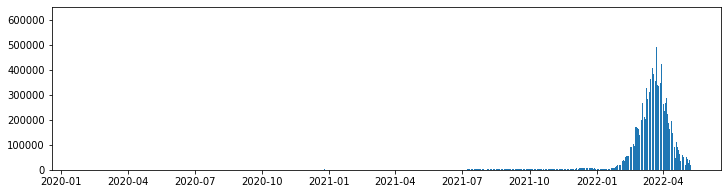

In [ ]:
plt.figure(figsize=(12,3)) # 그래프 박스 만들기
plt.bar(data.date, data.total) # 막대 그래프, 날짜와 전체 확진자를 표현한 그래프

In [ ]:
df = data.iloc[:200,:].copy() # 200일 까지만 끊어서 df에 넣음

<BarContainer object of 200 artists>

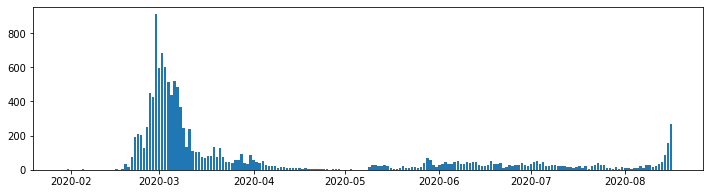

In [ ]:
plt.figure(figsize=(12,3)) # 12,3 사이즈의 그래프 박스를 만듦
plt.bar(df.date, df.total) # 막대 그래프, 200일와 전체 확진자를 표현한 그래프 

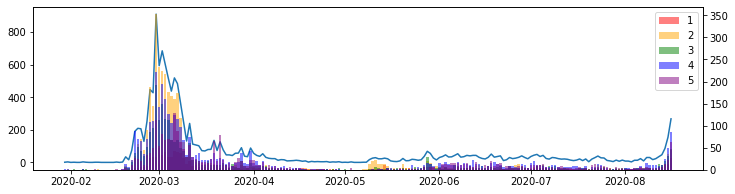

In [ ]:
D = df.date # 날짜 데이터
T = df.total # 전체 확진자 수 데이터
y1 = df["1"] # 연령대별로 데이터를 저장
y2 = df["2"] 
y3 = df["3"] 
y4 = df["4"] 
y5 = df["5"] 

plt.figure(figsize=(12,3)) # 그래프 박스 만들기

ax = plt.subplot() # 그래프 박스 안에 그래프를 그리겠다?

ax.plot(D, T) # 전체 확진자 수에 대한 시간에 대한 그래프

ax1 = ax.twinx()
ax1.bar(D, y1, label=1, color='r', alpha=0.5) # 각 연령대별로 그린 것
ax1.bar(D, y2, label=2, color='orange', alpha=0.5)
ax1.bar(D, y3, label=3, color='green', alpha=0.5)
ax1.bar(D, y4, label=4, color='b', alpha=0.5)
ax1.bar(D, y5, label=5, color='purple', alpha=0.5)

ax1.legend() # 범례를 그리는 코드


# plt.ylim(0, max(total))

---

In [ ]:
df = data.copy() # 복사
# 시간에서 년, 달, 계절로 나눔
df["year"] = df.date.dt.year # 년
df["month"] = df.date.dt.month # 달
df["season"] = (df.month//3) % 4    # {0:겨울, 1:봄, 2:여름, 3:가을} # 계절

In [ ]:
def season_df(DataFrame, season_code):
    YEAR = DataFrame.year.unique() # 년도 겹치는 것은 다 삭제 -> 2020, 2021, 2022만 남음 
    df_arr = []

    for y in YEAR: # 연도별로
        df = DataFrame[(DataFrame.season == season_code) & # 계절별로 모으는 것? 
                  (DataFrame.year == y)].iloc[:,2:7].sum() # 연령별로 모은 것? 
        print(df)
        df_arr.append(df)
    temp = pd.concat(df_arr, axis=1) # concat : 합치는 함수
    temp.columns = YEAR # 열을 년도로 설정
    return temp.T

1    2832
2    5484
3    6029
4    8394
5    5865
dtype: int64
1    43643
2    33387
3    42298
4    50162
5    39769
dtype: int64
1    687628
2    612899
3    601546
4    391292
5    198289
dtype: int64
1     566
2    2090
3    1300
4    1957
5    1389
dtype: int64
1     6340
2    10499
3    11433
4    13158
5     7236
dtype: int64
1    3629535
2    2986319
3    3340751
4    2651517
5    1820973
dtype: int64
1     618
2    1097
3    1290
4    2261
5    1647
dtype: int64
1    17479
2    32756
3    26752
4    22820
5     6772
dtype: int64
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
dtype: float64
1    1292
2    2312
3    2584
4    3643
5    2697
dtype: int64
1    37378
2    44261
3    42572
4    38048
5    31367
dtype: int64
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
dtype: float64


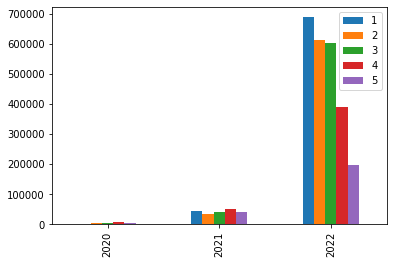

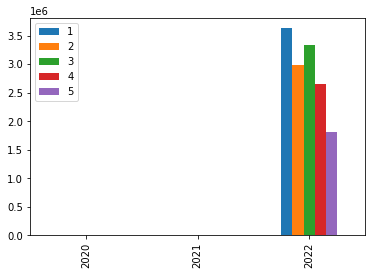

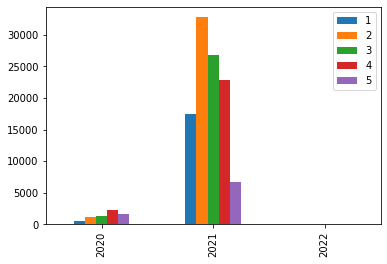

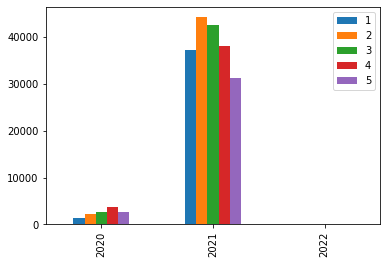

In [ ]:
for i in [0,1,2,3]: # 계절별로 그래프를 그림
    season_df(df, i).plot(kind='bar') # 연령별로 막대 그래프를 그림

---

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import SVC

In [ ]:
df = data.iloc[:85].copy() # 85일까지 끊음
# df = data.copy()
df['idx'] = df.index # 시간
df['total_sum'] = df.total.cumsum() # 전체 확진자의 누적 함수
df = df[['idx', 'total_sum']] # 시간과 누적 함수만 df에 저장

In [1]:
df = df.values # df의 값만 가져옴(시간, 누적함수)

y = df[:,1] # 누적함수
X = df[:,0] # 시간


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # train data와 test data 나눔
print(X_train)
X_train = X_train.reshape(-1,1) # train data의 모양을 바꿈
X_test = X_test.reshape(-1,1) # test data의 모양을 바꿈
print(X_train)
print(X_test)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

NameError: ignored

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1,1))

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


y_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_scaled, y_scaled)
y_preds = lr.predict(X_test_scaled)

In [ ]:
deg = 4
polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)
                        ])
pipeline.fit(X,y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [ ]:
svr = SVR()
svr.fit(X_scaled, y_scaled)
y_preds = svr.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


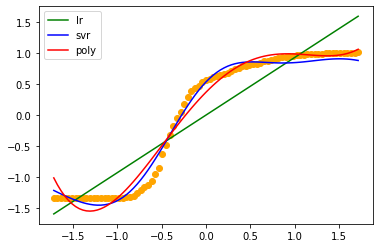

In [ ]:
plt.scatter(X,y, color='orange')
plt.plot(X,lr.predict(X), label="lr", color='g')
plt.plot(X,svr.predict(X), label='svr', color='b')
plt.plot(X, pipeline.predict(X), label='poly', color='r')
plt.legend()

---

In [ ]:
df = data.copy()
df['idx'] = df.index
df['label'] = 0
idx = []
wave = [('2020-02-18','2020-05-05'), ('2020-08-12','2020-11-12'), ('2020-11-13','2021-01-20')]

for w in wave:
    temp = df[df.date.between(w[0], w[1])].copy()
    idx += list(temp.index)

df.iloc[idx,-1] = 1

In [ ]:
df = df[['idx', 'total', '1', '2', '3', '4', '5', 'label']]

<BarContainer object of 831 artists>

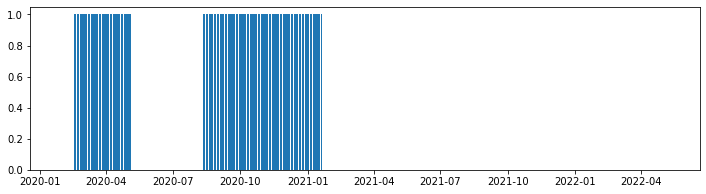

In [ ]:
plt.figure(figsize=(12,3))
plt.bar(data.date, df.label)

In [ ]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)


0      0
1      0
2      0
3      0
4      0
      ..
826    0
827    0
828    0
829    0
830    0
Name: label, Length: 831, dtype: int64


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm = SVC()
svm.fit(X_scaled, y_train)
y_preds = svm.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_preds)

0.88